In [ ]:
import torch

In [13]:
# utils is at ../utils
import sys
import os

# Add the parent directory (src) to the path so we can import from utils
sys.path.append(os.path.join(os.getcwd(), ".."))
from utils.general_utils import hello_world

In [14]:
hello_world()

Hello World


In [18]:
available_devices = ["cuda" if torch.cuda.is_available() else "cpu"]
if torch.backends.mps.is_available():
    available_devices.append("mps")
print("Available devices:", available_devices)
device = "mps" if "mps" in available_devices else "cpu"

Available devices: ['cpu', 'mps']


In [139]:
x = torch.randn(10, 10).to(device)
print(x)
print(x.device)
print(x.dtype)
print(x.shape)

tensor([[ 1.3123,  0.6872, -1.0892, -0.3553, -0.9138, -0.6581,  0.0780,  0.5258,
          1.1790, -0.4345],
        [-1.3864, -1.2862, -1.4032,  0.0360, -0.0635,  0.6756,  0.3672,  0.1754,
          1.3852, -0.4459],
        [ 1.4451,  0.8564,  2.2181,  0.5232,  1.1754,  0.5612, -0.4527, -0.7718,
         -0.1722,  0.5238],
        [ 0.0566,  0.4263,  0.1971, -1.1441,  0.3383,  1.6992,  0.0109, -0.3387,
         -1.3407, -0.5854],
        [-0.5644,  1.0563, -1.4692,  1.4332,  0.7440, -0.4816, -1.0495,  0.6039,
          0.4048, -1.3543],
        [-0.4976,  0.4747, -2.5095,  0.4880,  0.7846,  0.0286,  1.7423, -1.3527,
          0.2191,  0.5526],
        [-0.1853,  0.7528,  0.4048,  0.1785, -0.3165,  0.5886, -0.8905,  0.4098,
         -1.4570, -0.1023],
        [-0.5992,  0.4771, -0.1693,  0.2332,  4.0356,  1.2795, -0.0127,  0.2408,
          0.1325,  0.7642],
        [ 0.5177,  0.3878, -0.5797, -0.1691, -0.9727,  0.9585,  1.6192,  1.4506,
          0.2695, -0.2104],
        [-0.7328,  

# requires grad

attaches to tensors


In [140]:
x_1 = torch.tensor([2.0], requires_grad=True)
y = x_1**2 + 3 * x_1 + 1
y.backward()  # equivalent to dy/dx = 2x + 3 # has backward method since this is created from x_1, which is a torch tensor
print(x_1.grad)

# x_2 = torch.tensor([2.0, 3.0, 4.0], requires_grad=True)
# y = x_2**2 + 3 * x_2 + 1
# y.backward()
# print(x_2.grad)

tensor([7.])


# Note:

`<tensor object>.grad_fn` (i.e. attached to tensors) is the function that created the tensor object. (e.g. an add or a mul op, or if created from scratch, it's a None)

This is used by the autodifferentiation engine to figure out how to backpropagate the gradient. (autograd)


# Manual step-by-step linear regression

@ 22:30


In [166]:
N = 10
D_in = 1
D_out = 1

torch.manual_seed(42)

# create input data
X = torch.randn(N, D_in)  # this is just sample data
print(X.shape)  # 10 x 1
print(X)
true_W = torch.tensor([[2.0]])  # 1 x 1
true_b = torch.tensor(1.0)  # 1 x 1
# sample = X @ true_W # because of broadcasting, we get element-wise multiplication

y_true = X @ true_W + true_b  # y = 2x + 1
y_true_with_noise = X @ true_W + true_b + torch.randn(N, D_out) * 0.1
print("y_true")
print(y_true)


torch.Size([10, 1])
tensor([[ 0.3367],
        [ 0.1288],
        [ 0.2345],
        [ 0.2303],
        [-1.1229],
        [-0.1863],
        [ 2.2082],
        [-0.6380],
        [ 0.4617],
        [ 0.2674]])
y_true
tensor([[ 1.6734],
        [ 1.2576],
        [ 1.4689],
        [ 1.4607],
        [-1.2457],
        [ 0.6273],
        [ 5.4164],
        [-0.2760],
        [ 1.9233],
        [ 1.5347]])


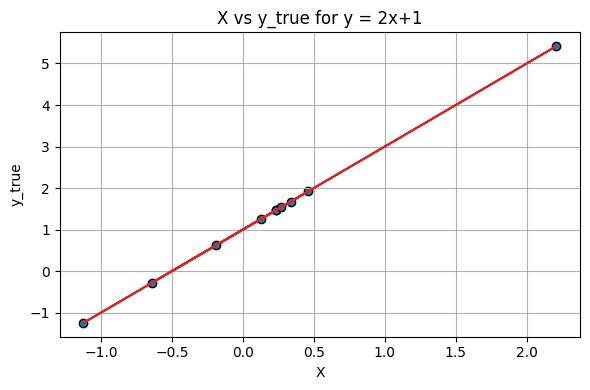

In [167]:
import matplotlib.pyplot as plt

x_np = X.detach().cpu().numpy().squeeze()
y_np = y_true.detach().cpu().numpy().squeeze()

# formula: y = 2x + 1
plt.figure(figsize=(6, 4))
plt.scatter(x_np, y_np, c="tab:blue", edgecolor="k")
plt.plot(x_np, 2 * x_np + 1, c="tab:red", label="true_fn")
plt.title("X vs y_true for y = 2x+1")
plt.xlabel("X")
plt.ylabel("y_true")
plt.grid(True)
plt.tight_layout()
plt.show()


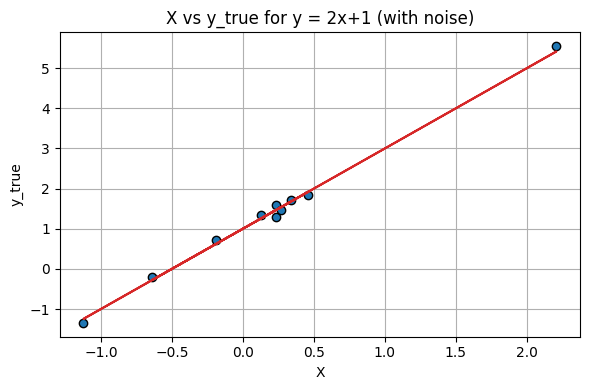

In [168]:
import matplotlib.pyplot as plt

x_np_with_noise = X.detach().cpu().numpy().squeeze()
y_np_with_noise = y_true_with_noise.detach().cpu().numpy().squeeze()

# formula: y = 2x + 1
plt.figure(figsize=(6, 4))
plt.scatter(x_np_with_noise, y_np_with_noise, c="tab:blue", edgecolor="k")
plt.plot(x_np_with_noise, 2 * x_np_with_noise + 1, c="tab:red", label="true_fn")
plt.title("X vs y_true for y = 2x+1 (with noise)")
plt.xlabel("X")
plt.ylabel("y_true")
plt.grid(True)
plt.tight_layout()
plt.show()


# Actual manual linear regression


In [169]:
# first, we create a random guess for W and b

W, b = torch.randn(D_in, D_out, requires_grad=True), torch.randn(1, requires_grad=True)
print(f"W: {W}, b: {b}")
print(f"true_W: {true_W}, true_b: {true_b}")

# then, we compute the predicted y
y_pred = X @ W + b
print("---------------")
print(f"y_true: {y_true}")
print(f"y_pred: {y_pred}")

loss = torch.mean((y_true - y_pred) ** 2)
print("------- step 1 loss")
print(loss)


W: tensor([[1.3525]], requires_grad=True), b: tensor([0.6863], requires_grad=True)
true_W: tensor([[2.]]), true_b: 1.0
---------------
y_true: tensor([[ 1.6734],
        [ 1.2576],
        [ 1.4689],
        [ 1.4607],
        [-1.2457],
        [ 0.6273],
        [ 5.4164],
        [-0.2760],
        [ 1.9233],
        [ 1.5347]])
y_pred: tensor([[ 1.1417],
        [ 0.8605],
        [ 1.0034],
        [ 0.9979],
        [-0.8324],
        [ 0.4343],
        [ 3.6730],
        [-0.1766],
        [ 1.3107],
        [ 1.0479]], grad_fn=<AddBackward0>)
------- step 1 loss
tensor(0.4741, grad_fn=<MeanBackward0>)


In [170]:
lr = 0.1

In [171]:
print(W.grad)

None


## Notes to self

We can think of G.D. as something like tuning a radio, y^hat = signal with static noise, y = true signal, W and b = knobs we can tune to get y^hat closer to y


In [ ]:
loss.backward()
print("W.grad")
print(W.grad)
print("b.grad")
print(b.grad)
with torch.no_grad():
    W -= lr * W.grad
    b -= lr * b.grad
# print loss and first 3 rows of the weights, and first 3 rows of the preds
print(f"loss: {loss}")
print(f"W: {W}")
print(f"b: {b}")
print(f"y_pred: {y_pred[:3]}")
print(f"y_true: {y_true[:3]}")


# zero out the gradients
W.grad.zero_()
b.grad.zero_()


tensor([[-1.0400]])
tensor([-0.8760])
loss: 0.47407668828964233
W: tensor([[1.4566]], requires_grad=True)
b: tensor([0.7739], requires_grad=True)
y_pred: tensor([[1.1417],
        [0.8605],
        [1.0034]], grad_fn=<SliceBackward0>)
y_true: tensor([[1.6734],
        [1.2576],
        [1.4689]])


tensor([0.])

In [173]:
y_pred = X @ W + b
loss = torch.mean((y_true - y_pred) ** 2)


loss.backward()
print(f"W.grad: {W.grad}")
print(f"b.grad: {b.grad}")
with torch.no_grad():
    W -= lr * W.grad
    b -= lr * b.grad
# print loss and first 3 rows of the weights, and first 3 rows of the preds
print(f"loss: {loss}")
print(f"W: {W}")
print(f"b: {b}")
print(f"y_pred: {y_pred[:3]}")
print(f"y_true: {y_true[:3]}")


# zero out the gradients
W.grad.zero_()
b.grad.zero_()


W.grad: tensor([[-0.8587]])
b.grad: tensor([-0.6609])
loss: 0.30802521109580994
W: tensor([[1.5424]], requires_grad=True)
b: tensor([0.8400], requires_grad=True)
y_pred: tensor([[1.2643],
        [0.9615],
        [1.1154]], grad_fn=<SliceBackward0>)
y_true: tensor([[1.6734],
        [1.2576],
        [1.4689]])


tensor([0.])

In [174]:
y_pred = X @ W + b
loss = torch.mean((y_true - y_pred) ** 2)


loss.backward()
print(f"W.grad: {W.grad}")
print(f"b.grad: {b.grad}")
with torch.no_grad():
    W -= lr * W.grad
    b -= lr * b.grad
# print loss and first 3 rows of the weights, and first 3 rows of the preds
print(f"loss: {loss}")
print(f"W: {W}")
print(f"b: {b}")
print(f"y_pred: {y_pred[:3]}")
print(f"y_true: {y_true[:3]}")


# zero out the gradients
W.grad.zero_()
b.grad.zero_()


W.grad: tensor([[-0.7113]])
b.grad: tensor([-0.4957])
loss: 0.2024017870426178
W: tensor([[1.6136]], requires_grad=True)
b: tensor([0.8896], requires_grad=True)
y_pred: tensor([[1.3593],
        [1.0387],
        [1.2016]], grad_fn=<SliceBackward0>)
y_true: tensor([[1.6734],
        [1.2576],
        [1.4689]])


tensor([0.])

## NOTE: i pressed rerun on the cell below about 10 times


In [193]:
y_pred = X @ W + b
loss = torch.mean((y_true - y_pred) ** 2)


loss.backward()
print(f"W.grad: {W.grad}")
print(f"b.grad: {b.grad}")
with torch.no_grad():
    W -= lr * W.grad
    b -= lr * b.grad
# print loss and first 3 rows of the weights, and first 3 rows of the preds
print(f"loss: {loss}")
print(f"W: {W}")
print(f"true_W: {true_W}")
print(f"b: {b}")
print(f"y_pred: {y_pred[:3]}")
print(f"y_true: {y_true[:3]}")


# zero out the gradients
W.grad.zero_()
b.grad.zero_()


W.grad: tensor([[-0.0339]])
b.grad: tensor([0.0091])
loss: 0.0004928114940412343
W: tensor([[1.9769]], requires_grad=True)
true_W: tensor([[2.]])
b: tensor([1.0087], requires_grad=True)
y_pred: tensor([[1.6741],
        [1.2639],
        [1.4724]], grad_fn=<SliceBackward0>)
y_true: tensor([[1.6734],
        [1.2576],
        [1.4689]])


tensor([0.])

# Plot of the trained model


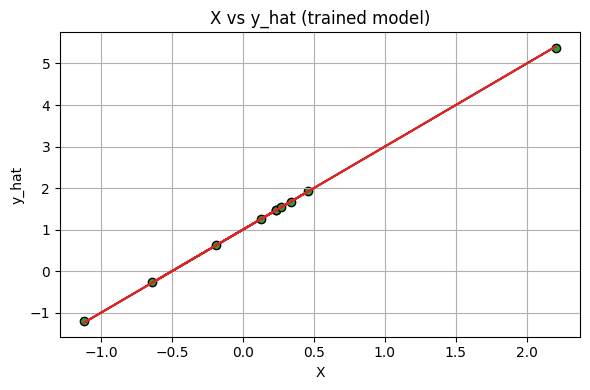

In [194]:
import matplotlib.pyplot as plt

with torch.no_grad():
    y_hat = X @ W + b

x_np = X.detach().cpu().numpy().squeeze()
y_hat_np = y_hat.detach().cpu().numpy().squeeze()

plt.figure(figsize=(6, 4))
plt.scatter(x_np, y_hat_np, c="tab:green", edgecolor="k", label="y_hat")
plt.plot(x_np, 2 * x_np + 1, c="tab:red", label="true_fn")
plt.title("X vs y_hat (trained model)")
plt.xlabel("X")
plt.ylabel("y_hat")
plt.grid(True)
plt.tight_layout()
plt.show()
